In [302]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os.path
img1 = cv2.imread("FamilyHDaughter1.JPG", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("FamilyBTwinDaughter2.JPG", cv2.IMREAD_GRAYSCALE)

In [303]:
sift = cv2.xfeatures2d.SIFT_create()
surf = cv2.xfeatures2d.SURF_create()
orb = cv2.ORB_create(nfeatures=15000)

In [305]:
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [306]:
im = cv2.drawKeypoints(img1, kp1, None)
cv2.imshow("Image", im)
cv2.waitKey(0)
cv2.destroyAllWindows()

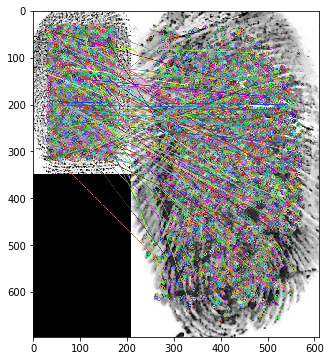

In [307]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bf.match(des1, des2)

# Sort the matches in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# draw the top N matches
N_MATCHES = 100

match_img = cv2.drawMatches(
    img1, kp1,
    img2, kp2,
    matches[:N_MATCHES], img2.copy(), flags=0)

plt.figure(figsize=(12,6))
plt.imshow(match_img)

In [308]:
len(matches)

4848

In [309]:
len(des1)

6764

In [310]:
len(des2)

14328

In [311]:
len(matches)/((len(des1)+len(des2))/2)

0.45970036032619005